[*********************100%%**********************]  3 of 3 completed


Data downloaded successfully
Data preprocessed successfully
Training data size: (2820, 3)
Testing data size: (706, 3)
X_train shape: (2719, 100, 1)
X_test shape: (605, 100, 1)
Model built successfully
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 63s 22ms/step - loss: 0.0012
Model trained successfully
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predictions made successfully


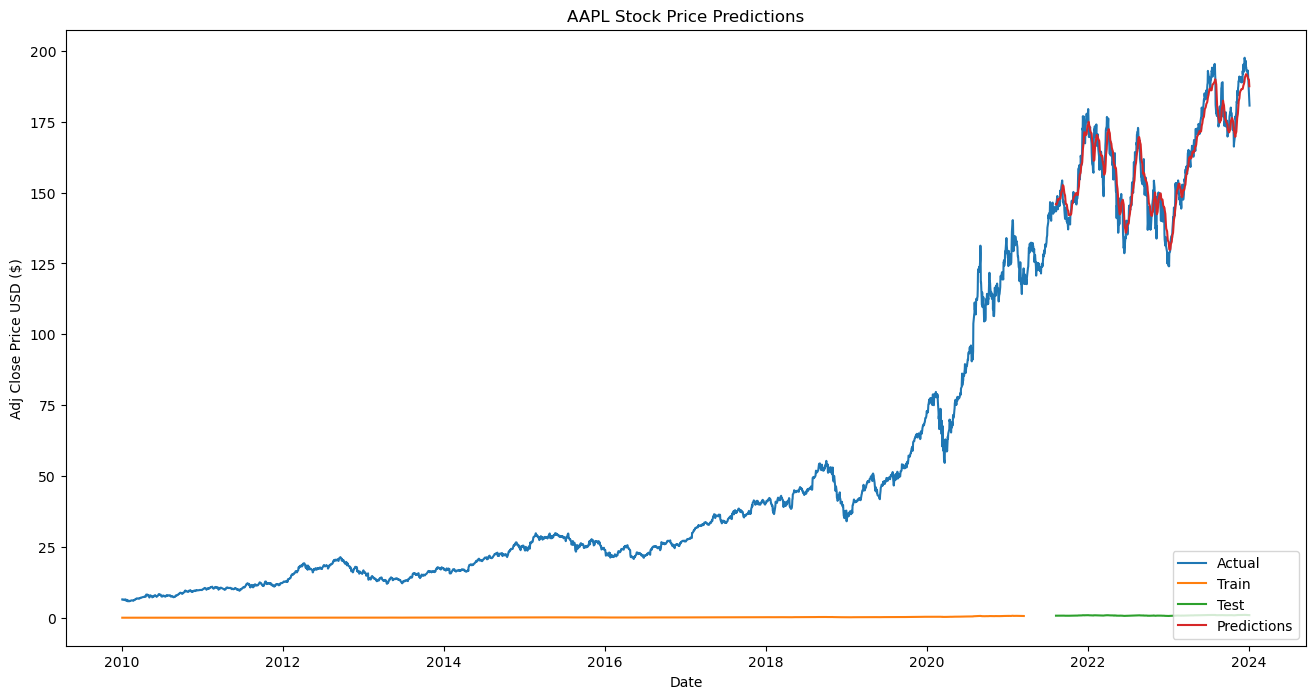

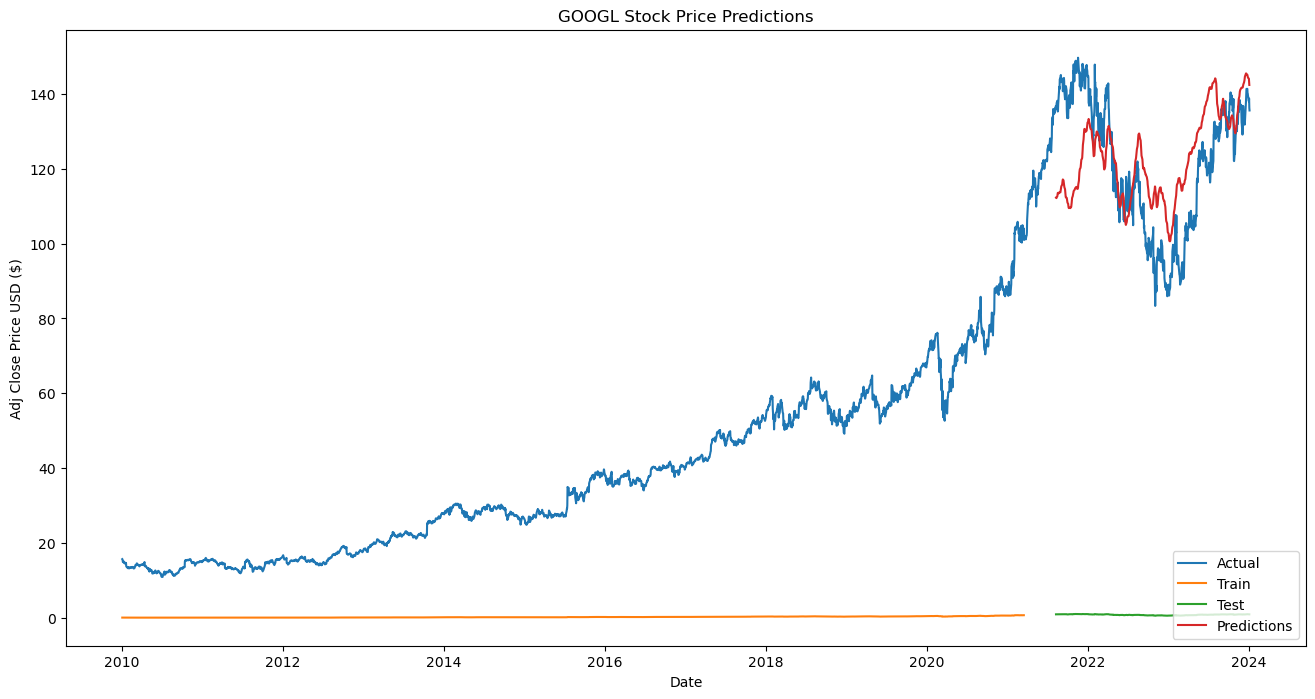

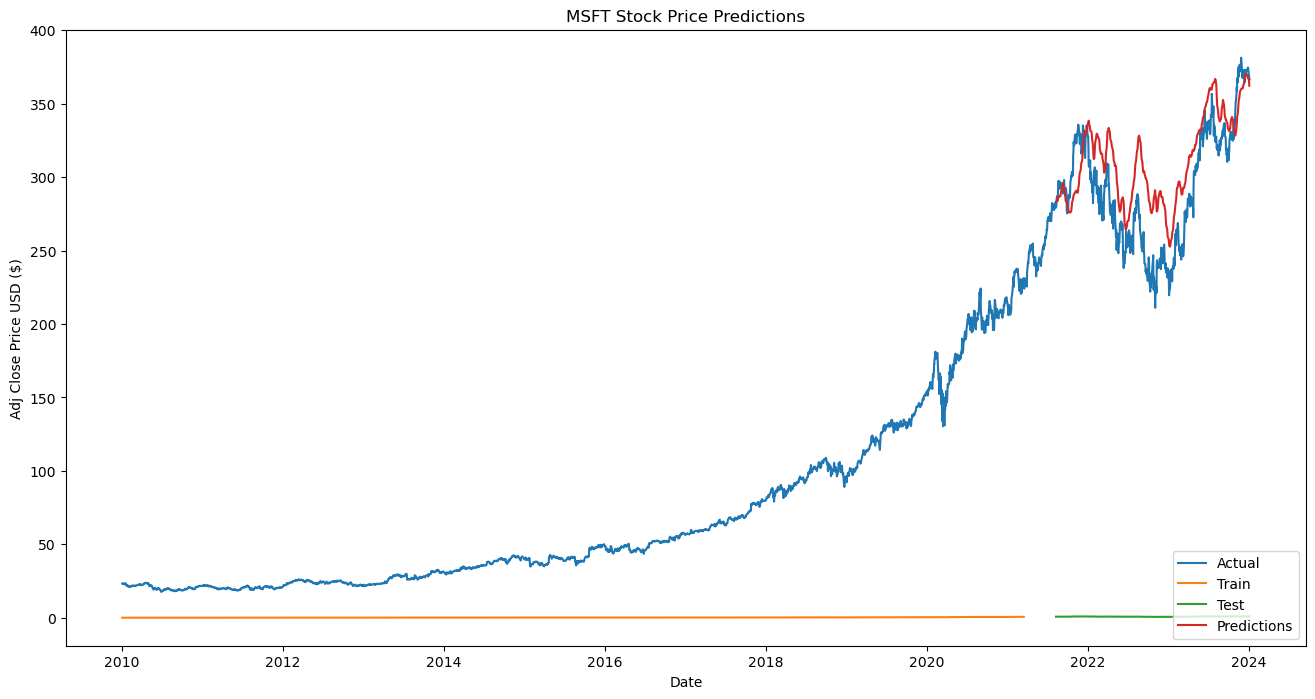

Model saved successfully


In [6]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
import matplotlib.pyplot as plt

# Step 1: Download Historical Stock Data
def download_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    data = data['Adj Close']  # Use the 'Adj Close' price
    data = data.fillna(method='ffill')  # Fill missing values
    return data

# Step 2: Preprocess Data
def preprocess_data(data):
    scalers = {}
    data_scaled = pd.DataFrame()
    for column in data.columns:
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_scaled[column] = scaler.fit_transform(data[column].values.reshape(-1, 1)).flatten()
        scalers[column] = scaler
    return data_scaled, scalers

# Step 3: Split Data into Training and Testing Sets
def split_data(data, split_ratio):
    train_size = int(len(data) * split_ratio)
    train_data = data[:train_size]
    test_data = data[train_size:]
    return train_data, test_data

# Step 4: Create Time-Series Data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # Create feature set
        X.append(a)
        Y.append(dataset[i + time_step, 0])  # Create label set
    return np.array(X), np.array(Y)

# Step 5: Build the LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 6: Train the Model
def train_model(model, X_train, y_train, epochs=1, batch_size=1):
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
    return model

# Step 7: Make Predictions
def make_predictions(model, X_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    return predictions

# Step 8: Plot the Data
def plot_predictions(data, train_data, test_data, predictions, title):
    plt.figure(figsize=(16, 8))
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Adj Close Price USD ($)')
    plt.plot(data)
    train_range = data.index[:len(train_data)]
    test_range = data.index[len(train_data) + 100:len(train_data) + 100 + len(predictions)]  # Adjusted range
    plt.plot(train_range, train_data, label='Train Data')
    plt.plot(test_range, test_data[100:100+len(predictions)], label='Test Data')  # Adjusted test data range
    plt.plot(test_range, predictions, label='Predictions')
    plt.legend(['Actual', 'Train', 'Test', 'Predictions'], loc='lower right')
    plt.show()

# Main function
def main():
    # Define parameters
    tickers = ['AAPL', 'GOOGL', 'MSFT']
    start_date = '2010-01-01'
    end_date = '2024-01-06'
    split_ratio = 0.8
    time_step = 100
    epochs = 1
    batch_size = 1

    # Step 1: Download Data
    data = download_stock_data(tickers, start_date, end_date)
    print("Data downloaded successfully")

    # Step 2: Preprocess Data
    data_scaled, scalers = preprocess_data(data)
    print("Data preprocessed successfully")

    # Step 3: Split Data
    train_data, test_data = split_data(data_scaled, split_ratio)
    print(f"Training data size: {train_data.shape}")
    print(f"Testing data size: {test_data.shape}")

    # Step 4: Create Dataset
    X_train, y_train = create_dataset(train_data.values, time_step)
    X_test, y_test = create_dataset(test_data.values, time_step)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")

    # Step 5: Build Model
    model = build_lstm_model((X_train.shape[1], 1))
    print("Model built successfully")

    # Step 6: Train Model
    model = train_model(model, X_train, y_train, epochs, batch_size)
    print("Model trained successfully")

    # Step 7: Make Predictions
    predictions_dict = {}
    for ticker in tickers:
        scaler = scalers[ticker]
        predictions_dict[ticker] = make_predictions(model, X_test, scaler)
    print("Predictions made successfully")

    # Step 8: Plot Predictions
    for ticker in tickers:
        plot_predictions(data[ticker], train_data[ticker], test_data[ticker], predictions_dict[ticker], f"{ticker} Stock Price Predictions")

    # Save the model
    model.save('stock_price_model.keras')
    print("Model saved successfully")

# Run the main function
if __name__ == "__main__":
    main()


[*********************100%%**********************]  3 of 3 completed

Epoch 1/10


85/85 - 5s - 54ms/step - loss: 0.0041
Epoch 2/10
85/85 - 3s - 30ms/step - loss: 1.3045e-04
Epoch 3/10
85/85 - 3s - 30ms/step - loss: 1.4954e-04
Epoch 4/10
85/85 - 3s - 30ms/step - loss: 1.2241e-04
Epoch 5/10
85/85 - 3s - 32ms/step - loss: 1.2279e-04
Epoch 6/10
85/85 - 3s - 30ms/step - loss: 1.1610e-04
Epoch 7/10
85/85 - 3s - 30ms/step - loss: 1.4187e-04
Epoch 8/10
85/85 - 3s - 30ms/step - loss: 9.9681e-05
Epoch 9/10
85/85 - 3s - 30ms/step - loss: 1.0428e-04
Epoch 10/10
85/85 - 3s - 30ms/step - loss: 1.0202e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
RMSE for AAPL: 160.59045742378598


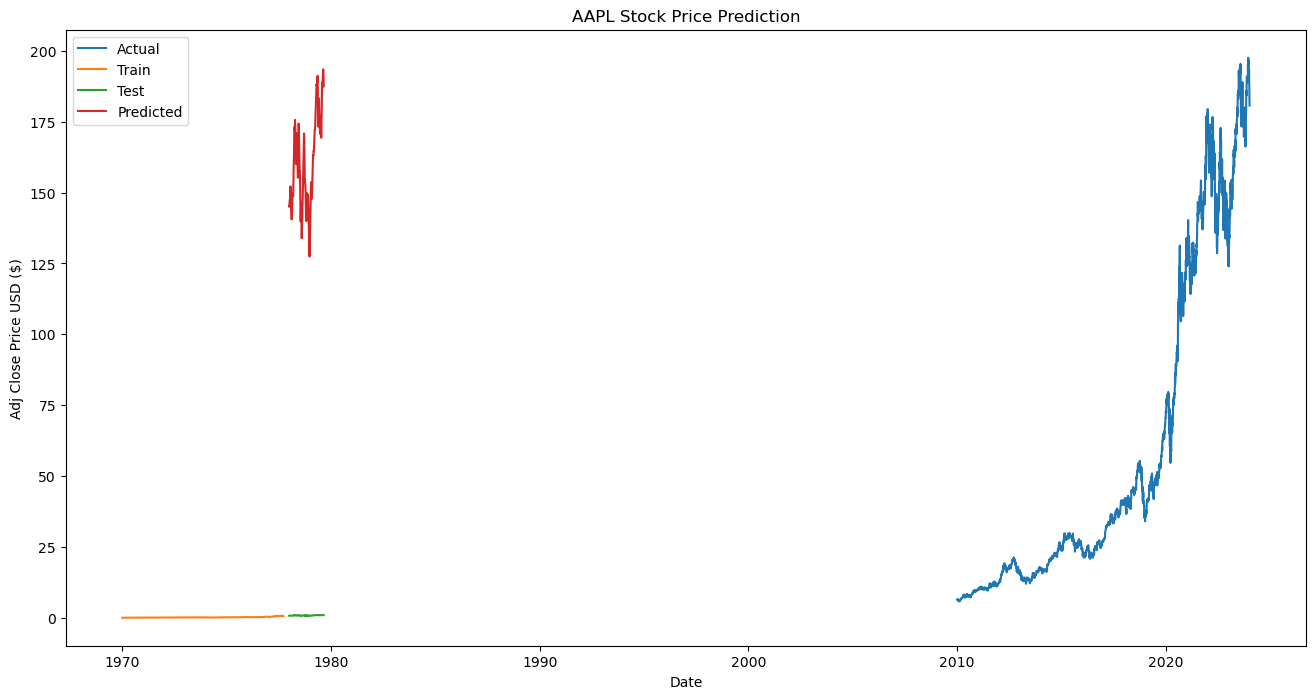

Epoch 1/10
85/85 - 5s - 53ms/step - loss: 0.0026
Epoch 2/10
85/85 - 3s - 30ms/step - loss: 1.4037e-04
Epoch 3/10
85/85 - 3s - 30ms/step - loss: 1.4187e-04
Epoch 4/10
85/85 - 3s - 30ms/step - loss: 1.4278e-04
Epoch 5/10
85/85 - 3s - 30ms/step - loss: 1.3746e-04
Epoch 6/10
85/85 - 3s - 30ms/step - loss: 1.2342e-04
Epoch 7/10
85/85 - 3s - 30ms/step - loss: 1.1957e-04
Epoch 8/10
85/85 - 3s - 30ms/step - loss: 1.1583e-04
Epoch 9/10
85/85 - 3s - 30ms/step - loss: 1.1380e-04
Epoch 10/10
85/85 - 3s - 30ms/step - loss: 1.0896e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
RMSE for GOOGL: 121.08723379017202


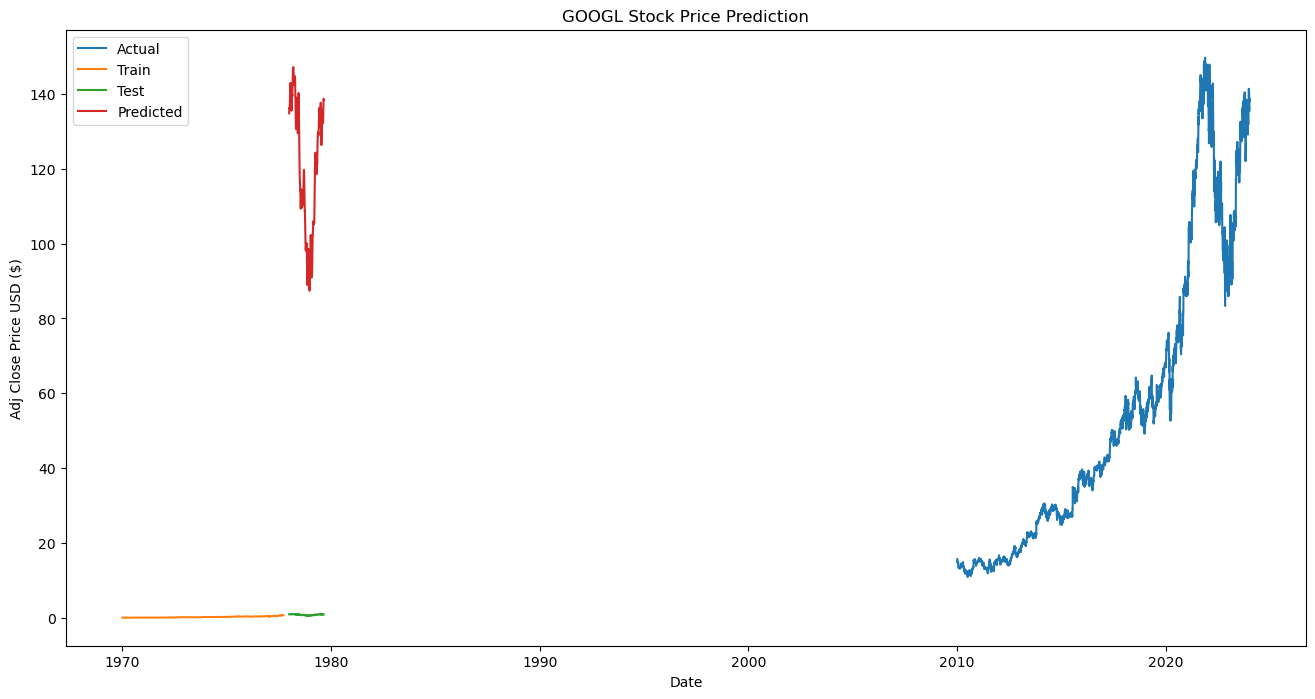

Epoch 1/10
85/85 - 5s - 63ms/step - loss: 0.0016
Epoch 2/10
85/85 - 3s - 30ms/step - loss: 7.1780e-05
Epoch 3/10
85/85 - 3s - 30ms/step - loss: 7.3040e-05
Epoch 4/10
85/85 - 3s - 30ms/step - loss: 7.3122e-05
Epoch 5/10
85/85 - 3s - 30ms/step - loss: 6.9935e-05
Epoch 6/10
85/85 - 3s - 30ms/step - loss: 7.5713e-05
Epoch 7/10
85/85 - 3s - 30ms/step - loss: 9.3019e-05
Epoch 8/10
85/85 - 3s - 30ms/step - loss: 7.7241e-05
Epoch 9/10
85/85 - 3s - 30ms/step - loss: 8.0950e-05
Epoch 10/10
85/85 - 3s - 30ms/step - loss: 7.5686e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
RMSE for MSFT: 289.3193525176847


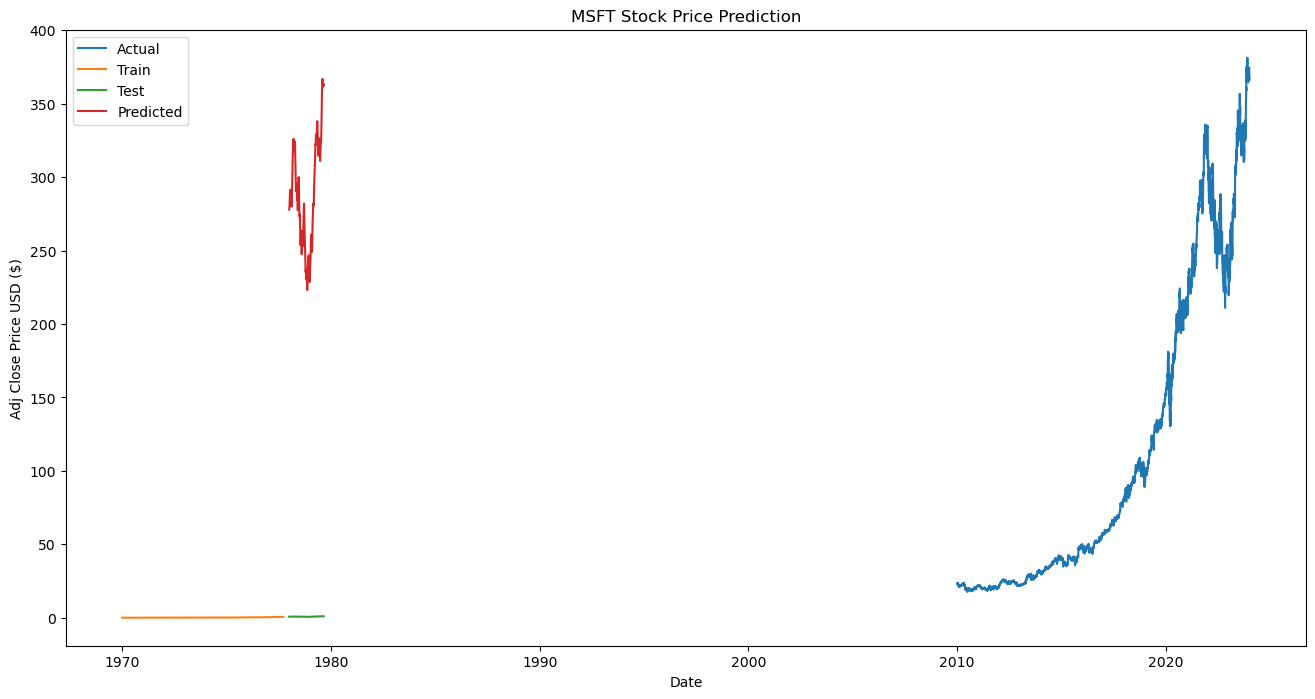

In [8]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import joblib

# Function to download and preprocess data
def download_and_preprocess_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    data = data['Adj Close'].fillna(method='ffill')
    scalers = {ticker: MinMaxScaler(feature_range=(0, 1)) for ticker in tickers}
    scaled_data = pd.DataFrame({ticker: scalers[ticker].fit_transform(data[ticker].values.reshape(-1, 1)).flatten() for ticker in tickers})
    return data, scaled_data, scalers

# Function to create time-series dataset
def create_time_series(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Function to build the LSTM model
def build_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to plot the data
def plot_data(data, train_data, test_data, predictions, title):
    plt.figure(figsize=(16, 8))
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Adj Close Price USD ($)')
    plt.plot(data.index, data.values, label='Actual')
    plt.plot(train_data.index, train_data.values, label='Train')
    plt.plot(test_data.index, test_data.values, label='Test')
    plt.plot(test_data.index[-len(predictions):], predictions, label='Predicted')
    plt.legend()
    plt.show()

# Main function to execute the workflow
def main():
    tickers = ['AAPL', 'GOOGL', 'MSFT']
    start_date = '2010-01-01'
    end_date = '2024-01-06'
    time_step = 100
    epochs = 10
    batch_size = 32
    split_ratio = 0.8

    data, scaled_data, scalers = download_and_preprocess_data(tickers, start_date, end_date)
    for ticker in tickers:
        ticker_data = scaled_data[[ticker]]
        train_size = int(len(ticker_data) * split_ratio)
        train_data = ticker_data[:train_size]
        test_data = ticker_data[train_size:]

        X_train, y_train = create_time_series(train_data.values, time_step)
        X_test, y_test = create_time_series(test_data.values, time_step)

        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        model = build_model((X_train.shape[1], 1))
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

        predictions = model.predict(X_test)
        predictions = scalers[ticker].inverse_transform(predictions)

        # Align the length of test data and predictions
        y_test_actual = test_data.values[time_step:]
        
        # Evaluate the model
        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
        print(f'RMSE for {ticker}: {rmse}')

        plot_data(data[ticker], train_data[ticker], test_data[ticker].iloc[time_step:], predictions, f"{ticker} Stock Price Prediction")

        # Save the model and scaler
        model.save(f'{ticker}_stock_price_model.keras')
        joblib.dump(scalers[ticker], f'{ticker}_scaler.pkl')

if __name__ == "__main__":
    main()

